# Introduction

Le double pendule est souvent le premier contact que les étudiants en sciences physiques ont avec les systèmes chaotiques. Nous développerons ici un peu les bases mathématiques sous-jacentes à la résolution des équations du mouvement, du point de vue de la mécanique Lagrangienne.

# Problème

Nous nous intéressons à un double pendule dont les masses $m_1$ et $m_2$ sont égales à 1 kg, et dont les deux tiges sont de longueurs égales $l_1 = l_2 =$ 1 m. Comme les longueurs des tiges sont invariantes, on peut utiliser les angles relatifs des deux pendules $\theta_1$ et $\theta_2$ comme coordonnées généralisées pour simplifier le problème. On définira la position du premier barreau par :
\begin{align*}
x_1 = \frac{l}{2}\sin(\theta_1)\ ; y_1 = -\frac{l}{2}\cos(\theta_1
\end{align*}
Et celles du second par :
\begin{align*}
    x_2 = l(\sin{\theta_1} + \dfrac{1}{2}\sin{\theta_2})\ ; \ y_2 = -l(\cos{\theta_1} + \dfrac{1}{2}\cos{\theta_2})
\end{align*}
<br>
Le lagrangien qui minimise l'action est donc donné par $T - V$, i.e. : 

\begin{align*}
L &= \dfrac{1}{2}m(v_1^2 + v_2^2) + \dfrac{1}{2}I(\dot{\theta}_1^2 + \dot{\theta}_2^2) - mg(y_1 + y_2) \\
&= \dfrac{1}{2}m(\dot{x}_1^2 + \dot{y}_1^2 + \dot{x}_2^2 + \dot{y}_2^2) + \dfrac{1}{2}I(\dot{\theta}_1^2 + \dot{\theta}_2^2) - mg(y_1 + y_2)
\end{align*}

Ce qui avec les coordonnées du problème et après réarrangement nous donne finalement : 


\begin{align*}
L = \dfrac{1}{6}ml^2(\dot{\theta}_2^2 + 4\dot{\theta}_1^2 + 3\dot{\theta}_1\dot{\theta}_2\cos{(\theta_1 - \theta_2)}) + \dfrac{1}{2}mgl(3\cos{\theta_1}+\cos{\theta_2})
\end{align*}   
Pour déterminer les équations du mouvement, on pourrait être tenté de résoudre les équations d'Euler-Lagrange : 

\begin{align*}
\dfrac{\partial L}{\partial \theta_i} -\dfrac{d}{dt}\dfrac{\partial L}{\partial \dot{\theta}_i} = 0 \\
\end{align*}

Nous nous baserons plutôt sur la méthode de la page wikipédia consacrée au problème, c'est à dire d'une part en écrivant les impulsions généralisées :

\begin{align*}
    p_{\theta_1} &= \dfrac{\partial L}{\partial \dot{\theta}_1} = \dfrac{1}{6}ml^2(8\dot{\theta}_1+3\dot{\theta}_2\cos{(\theta_1 - \theta_2)})\\
    p_{\theta_2} &= \dfrac{\partial L}{\partial \dot{\theta}_2} = \dfrac{1}{6}ml^2(2\dot{\theta}_2+3\dot{\theta}_1\cos{(\theta_1 - \theta_2)})
\end{align*}
Desquelles nous pouvons extraire les vitesses généralisées :

\begin{align*}
    \dot{\theta}_1 &= \dfrac{6}{ml^2}\dfrac{2p_{\theta_1}-3\cos{(\theta_1 - \theta_2)}p_{\theta_2}}{16-9\cos^2{(\theta_1 - \theta_2)}}\\
    \dot{\theta}_2 &= \dfrac{6}{ml^2}\dfrac{8p_{\theta_2}-3\cos{(\theta_1 - \theta_2)}p_{\theta_1}}{16-9\cos^2{(\theta_1 - \theta_2)}}
\end{align*}

Les équations du mouvement résultantes sont donc : 

\begin{align*}
    \dot{p_{\theta_1}} &= \dfrac{\partial L}{\partial \theta_1} = -\dfrac{1}{2}ml^2(\dot{\theta}_1\dot{\theta}_2\sin{(\theta_1-\theta_2})+3\dfrac{g}{l}\sin{\theta_1})\\
    \dot{p_{\theta_2}} &= \dfrac{\partial L}{\partial \theta_2} = -\dfrac{1}{2}ml^2(-\dot{\theta}_1\dot{\theta}_2\sin{(\theta_1-\theta_2})+\dfrac{g}{l}\sin{\theta_2})
\end{align*}

Ces équations ne sont pas intégrables analytiquement, et c'est ici qu'intervient l'analyse numérique du problème.

# La méthode RK4

La méthode d'analyse numérique que nous allons utiliser est très connue, c'est celle développée parl Carl Runge et Martin Wilhem Kutta au début du vingtième siècle, appellée méthode Runge-Kutta 4. C'est une méthode itérative qui permet de résoudre des équations différentielles par approximation quand on connaît les conditions initiales, ce qui correspond bien au problème posé.

Le but est de résoudre une équation différentielle mise sous forme de 
système différentiel :


$$
 \left\{
    \begin{array}{ll}
       \dfrac{dy}{dt}&= f(t,y(t)), 0\leq \ t \leq T \\
        y(0) &= y_0
    \end{array}
\right.
$$


En intégrant l'équation différentielle entre $t_1$ et $t_2$, on obtient la relation :


$$
y(t_{n+1})- y(t_n) = \displaystyle \int_{t_n}^{t_n + h} f(t,y(t))dt
$$
Il s'agira de discrétiser $t$ en $steps$ que nous aurons choisi. On notera $h$ ce pas.
La méthode la plus simple pour calculer cette intégrale est la méthode d'Euler. RK4 utilise la méthode de Simpson pour approximer l'intégrale :

$$
\displaystyle \int_{t_n}^{t_{n+1}} f(t, y(t))dt \simeq \dfrac{h}{6}[f(t_n,y(t_n)) + 4f(t_{n+1/2},y(t_{n+1/2}))+f(t_{n+1}),y(t_{n+1}))]
$$

d'où la relation 

$$
y_{n+1} = y_n + \dfrac{h}{6}[f(t_n,y_n)+4f(t_{n+1/2},y_{n+1/2})+f(t_{n+1},y(t_{n+1}))]
$$

Le schéma explicite, dit de Runge-Kutta d'ordre 4 est donc :

$$
y_{n+1} = y_n +h \bigg[\dfrac{1}{6}k_1 + \dfrac{1}{3}k_2 + \dfrac{1}{3}k_3 + \dfrac{1}{6}k_4\bigg]
\ avec \
\left\{
    \begin{array}{ll}
        k_1 = f(t_n,y_n)\\
        k_2 = f(t_n + \frac{1}{2}h, y_n + \frac{1}{2}hk_1)\\
        k_3 = f(t_n + \frac{1}{2}h, y_n + \frac{1}{2}hk_2)\\
        k_4 = f(t_n + \frac{1}{2}h, y_n + \frac{1}{2}hk_3)
    \end{array}
\right.
$$

Dans notre problème les équations différentielles à résoudre sont celles sur les vitesses angulaires $\dot\theta_1$ et $\dot\theta_2$ et sur les forces $\dot{p}_{\theta_1}$ et $\dot{p}_{\theta_2}$. Il suffit alors d'appliquer l'algorithme : on initialise le pas *h*, la durée *T*, les conditions initiales et les fonctions $\dot\theta_i$ et $\dot{p}_{\theta_i}$. Puis, tant que le temps écoulé est inférieur à la durée, on calcule on calcule les coefficients et on réitère.

# Bibliographie 

- La résolution du problème du double pendule est intégralement tirée de : https://en.wikipedia.org/wiki/Double_pendulum

- Méthode RK4 : https://femto-physique.fr/omp/runge-kutta.php, https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods, http://www.cinam.univ-mrs.fr/klein/teach/mip/numeriq/node46.html

- Practical Numerical Methods with Python


do you want to choose the variables and constantes of the problem ? if you want to press 1 if you dont press any other key 
answer=0
Our order of convergence is : p= 3.879


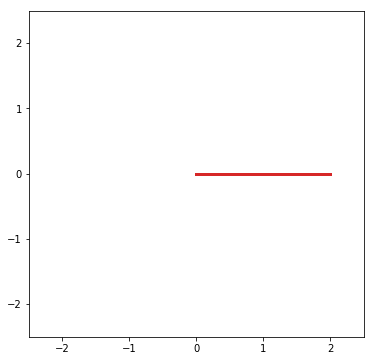

In [4]:
from math import *
import numpy
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

print('do you want to choose the variables and constantes of the problem ? if you want to press 1 if you dont press any other key ')
answer=int(input('answer='))

if answer==1:
    our_variables=(numpy.array([pi/2,pi/2,float(input("P_1=")),float(input("P_2="))])) #on définit nos angles/impulsions de départs
    our_constantes=(numpy.array([float(input('m=')),float(input('l=')),float(input('g=')),float(input('dt=')),float(input('T='))]))
else:
    our_variables=numpy.array([pi/2,pi/2,0,0])
    our_constantes=numpy.array([1,1,9.81,0.001,20])
m=our_constantes[0]      # on définit les constantes de notre problème (poids, longueurs ...)
l=our_constantes[1]
g=our_constantes[2]
dt=our_constantes[3]
T=our_constantes[4]

def vector_function(variables):
    O_1=variables[0] #fonction vectorielle qui nous donne l'expression des dérivées des angles/impulsions
    O_2=variables[1] # à partir de leur valeur actuelle
    P_1=variables[2] #l'ordre des dérivées dans le vecteur obtenu correspond à l'ordre dans our_variables
    P_2=variables[3]
    Angle_1_var=6*(m*(l**2)*((2*P_1)-(3*cos(O_1-O_2)*P_2))/(16-9*(cos(O_1-O_2))**2))
    Angle_2_var=6*(m*(l**2)*((8*P_2)-3*cos(O_1-O_2)*P_1)/(16-9*(cos(O_1-O_2))**2))
    P_1_var=(-(1/2)*m*(l**2))*((Angle_1_var*Angle_2_var*sin(O_1-O_2))+3*(g/l)*sin(O_1))
    P_2_var=(-(1/2)*m*(l**2))*((-Angle_1_var*Angle_2_var*sin(O_1-O_2))+((g/l)*sin(O_2)))
    variables_derivative=numpy.array([Angle_1_var,Angle_2_var,P_1_var,P_2_var])
    out=variables_derivative
    return out

def RK_4(variables):
    our_variables_list=[variables] #on crée une liste où on stocke l'évolution des angles/impulsions dans le temps
    i=1
    N=T/dt
    while i < N:   #méthode RK_4 
        k_1=dt*vector_function(variables)
        k_2=dt*vector_function(variables+(1/2)*k_1)
        k_3=dt*vector_function(variables+(1/2)*k_2)
        k_4=dt*vector_function(variables+k_3)
        variables=variables+(1/6)*(k_1+2*k_2+2*k_3+k_4)
        our_variables_list.append(variables)
        i=i+1  
    out=our_variables_list
    return out

r = 0.5
h = 0.001
dt_values = [h, r * h, r**2 * h]
u_values = []

for dt in dt_values:
    u =our_variables
    u_values.append(RK_4(u))

def list_distance(list_1, list_2,dt):
    N_1 = len(list_1)
    N_2 = len(list_2)
    if N_1 > N_2: 
        ratio = ceil(N_1 / N_2)
        summation=dt*numpy.sum(numpy.abs(numpy.array(list_1[::ratio])-numpy.array(list_2)))
    else:
        ratio = ceil(N_2 / N_1)   
        summation=dt*numpy.sum(numpy.abs(numpy.array(list_2[::ratio])-numpy.array(list_1)))   
    return summation

distance_values = []
for n in range(2):
    distance_values.append(list_distance(u_values[n],u_values[n+1],dt_values[n+1]))
    
delta_1=distance_values[0]
delta_2=distance_values[1]

order_of_convergence=(log(delta_2/delta_1)/log(r))

print('Our order of convergence is : p= {:.3f}'.format(order_of_convergence))

Angle_list=RK_4(our_variables)
N=int(T/dt)
Angle_1_list=[]
Angle_2_list=[]
i=0
x_1=[]
x_2=[]
y_1=[]
y_2=[]
while i < N:
    Angle_1_list.append(Angle_list[i][0])
    Angle_2_list.append(Angle_list[i][1])
    x_1.append(l*sin(Angle_1_list[i]))
    y_1.append((-l)*cos(Angle_1_list[i]))
    x_2.append(l*(sin(Angle_1_list[i])+sin(Angle_2_list[i])))
    y_2.append((-l)*(cos(Angle_1_list[i])+cos(Angle_2_list[i])))
    i=i+1
    
fig = plt.figure(figsize=(6.0, 6.0))
plt.xlim(-2.5*l, 2.5*l)
plt.ylim(-2.5*l, 2.5*l)
pendule_1=plt.plot([0,x_1[0]],[0,y_1[0]],'C3',linewidth=3)[0]
pendule_2=plt.plot([x_1[0],x_2[0]],[y_1[0],y_2[0]],'C3',linewidth=3)[0]
line=plt.plot(x_2[0],y_2[0])[0]

def update_plot(n,x_1,x_2,y_1,y_2):
    pendule_1.set_xdata([0,x_1[n]])
    pendule_1.set_ydata([0,y_1[n]])
    pendule_2.set_xdata([x_1[n],x_2[n]])
    pendule_2.set_ydata([y_1[n],y_2[n]])
    line.set_xdata(x_2[0:n])
    line.set_ydata(y_2[0:n])
    return pendule_1,pendule_2,line

anim = animation.FuncAnimation(fig, update_plot,frames=range(0,N,20), fargs=(x_1,x_2,y_1,y_2,),interval=20,blit=True)
#Remarque: Les données du 3ème argument de range(,,*) ainsi que la valeur de la "intevral=" devront être modifier afin d'obtenir
#          une animation sans temps de calcul interminable et en temps réel si on change les données initiales du problème 

HTML(anim.to_html5_video())

# Bibliographie 

- La résolution du problème du double pendule est intégralement tirée de : https://en.wikipedia.org/wiki/Double_pendulum

- Méthode RK4 : https://femto-physique.fr/omp/runge-kutta.php, https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods, http://www.cinam.univ-mrs.fr/klein/teach/mip/numeriq/node46.html

- Practical Numerical Methods with Python